## Validation curves (plotting scores to evaluate models) and Grid Search
https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve<br>
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Temporarily Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

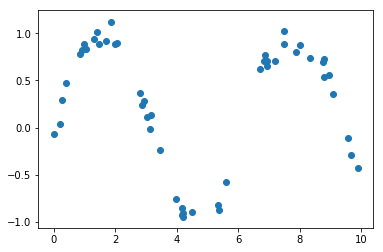

In [4]:
np.random.seed(1)
x = 10 * np.random.rand(50)
y = np.sin(x) + 0.1 * np.random.randn(50)
plt.scatter(x, y)

In [5]:
poly_model = make_pipeline(PolynomialFeatures(),
                           LinearRegression())

In [6]:
poly_model.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

## Validation curves in Scikit-Learn

In [8]:
degree


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [7]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
from sklearn.model_selection import validation_curve
degree = np.arange(0, 25)

train_score, val_score = validation_curve(poly_model, x[:, np.newaxis], y, 
                                          'polynomialfeatures__degree', degree, cv=5)
print(train_score.shape)
print(train_score[0:5,])
print(val_score.shape)
print(val_score[0:5,])

(25, 5)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.29795129e-03 1.53228759e-03 7.33473446e-03 1.01875809e-02
  5.71388154e-04]
 [7.11543975e-02 8.15350974e-02 1.30376011e-01 1.41969628e-01
  1.49921460e-01]
 [1.97769486e-01 1.75550943e-01 1.64310719e-01 1.81805510e-01
  1.70642985e-01]
 [8.48738636e-01 8.76477513e-01 8.74818394e-01 8.78095035e-01
  8.89765363e-01]]
(25, 5)
[[-0.12870316 -0.00349782 -0.67861429 -0.01280816 -0.01577095]
 [-0.12953372  0.00320043 -0.77633049 -0.04481235 -0.00540179]
 [ 0.08813738  0.19106869 -0.6652342  -0.03189693 -0.14951873]
 [-0.05309076  0.124367   -0.30151812  0.08201262  0.05386575]
 [ 0.9051348   0.84816795  0.68417784  0.83310873  0.6968646 ]]


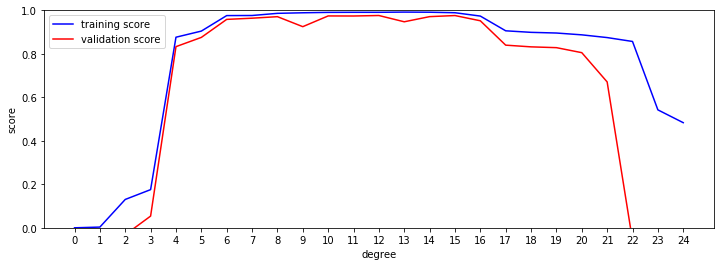

In [9]:
plt.figure(figsize=(12,4))
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.xticks(degree)
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes over-fit.

Optimal degree is ???

## Validation in Practice: Grid Search

In practice, models generally have more than one knob to turn and plots of validation curves change from lines to multi-dimensional surfaces.In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid search module.
Here is an example of using grid search to find the optimal polynomial model.
We will explore a two-dimensional grid of model features; namely the polynomial degree and the flag telling us whether to normalize.

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(4,17),
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(poly_model, param_grid, cv=5)

In [11]:
grid.fit(x[:, np.newaxis], y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
grid.best_params_

{'linearregression__normalize': False, 'polynomialfeatures__degree': 10}

In [13]:
grid.best_score_

0.9594034766352064

In [ ]:
# grid.grid_scores_

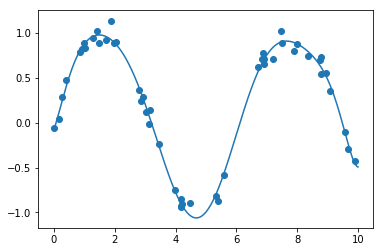

In [15]:
# Build a model using best parameters

poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit);

## Learning curves in Scikit-Learn

In [16]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(poly_model, x[:, np.newaxis], y, cv=5, 
                                     train_sizes=np.linspace(0.3, 1, 20))

In [17]:
np.linspace(0.3, 1, 20)

array([0.3       , 0.33684211, 0.37368421, 0.41052632, 0.44736842,
       0.48421053, 0.52105263, 0.55789474, 0.59473684, 0.63157895,
       0.66842105, 0.70526316, 0.74210526, 0.77894737, 0.81578947,
       0.85263158, 0.88947368, 0.92631579, 0.96315789, 1.        ])

In [19]:
N

array([12, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35,
       37, 38, 40])

In [20]:
plt.figure(figsize=(12,4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

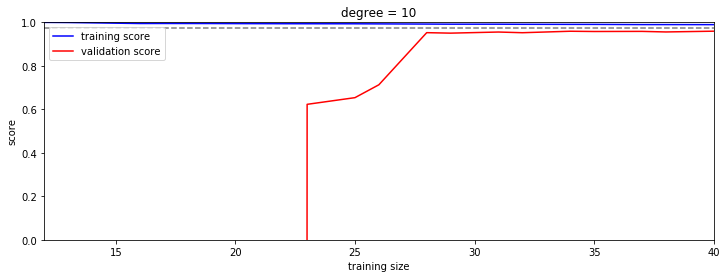

In [18]:
plt.figure(figsize=(12,4))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.ylim(0, 1)
plt.xlim(N[0], N[-1])
plt.xlabel('training size')
plt.ylabel('score')
plt.title('degree = 10')
plt.legend(loc='best');